In [15]:
from sklearn import datasets
from sklearn import decomposition
import pandas as pd
import seaborn as sns

dat = datasets.load_iris()
iris = pd.DataFrame(data=dat['data'], columns=dat['feature_names'])
iris["species"] = dat["target"].astype(str)

del dat

iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [16]:
pca = decomposition.PCA(n_components=2)

In [17]:
reduction = pca.fit_transform(iris)

evaluate = pd.DataFrame(reduction)
evaluate.columns = ['PC1', 'PC2']
evaluate = pd.concat([evaluate, iris["species"]], axis=1)
evaluate

,PC1,PC2,species
0,-2.865507,0.302780,0
1,-2.893213,-0.176987,0
2,-3.055749,-0.168006,0
3,-2.921249,-0.325027,0
4,-2.906751,0.302333,0
...,...,...,...
145,2.173019,0.127024,2
146,1.783549,-0.443428,2
147,2.005057,0.009767,2
148,2.134714,0.036622,2


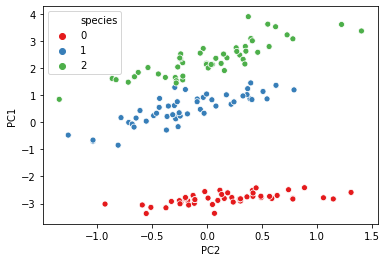

In [22]:
# palette required because of weird sns bug

#Most information is retained to be able to split the groups into their various species
sns.scatterplot(y="PC1", 
                x="PC2", 
                hue="species", 
                data=evaluate, 
                palette=sns.color_palette("Set1", evaluate['species'].nunique())) 

In [24]:
# the principal components should not be correlated.
evaluate[["PC1", "PC2"]].corr()

,PC1,PC2
PC1,1.000000e+00,3.442070e-17
PC2,3.442070e-17,1.000000e+00


In [26]:
for pc, ev in zip(range(1, 3), (pca.explained_variance_ratio_)):
    print(f"Principle component {pc} explains {ev * 100}% of the variance in the data.\n")
    
print(f"Together they explain {sum(pca.explained_variance_ratio_) * 100}%.")

Principle component 1 explains 92.26404498570732% of the variance in the data.

Principle component 2 explains 4.810411202812629% of the variance in the data.

Together they explain 97.07445618851995%.
